In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset
bank_data = pd.read_csv('new_train.csv')

# Inspect the first few rows of the dataset
print(bank_data.head())

# Check the data types and non-null counts
print(bank_data.info())

# Get basic statistics of the dataset
print(bank_data.describe())


   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexiste

In [4]:
# Check for missing values
print(bank_data.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


                age      duration      campaign         pdays      previous
count  32950.000000  32950.000000  32950.000000  32950.000000  32950.000000
mean      40.014112    258.127466      2.560607    962.052413      0.174719
std       10.403636    258.975917      2.752326    187.951096      0.499025
min       17.000000      0.000000      1.000000      0.000000      0.000000
25%       32.000000    103.000000      1.000000    999.000000      0.000000
50%       38.000000    180.000000      2.000000    999.000000      0.000000
75%       47.000000    319.000000      3.000000    999.000000      0.000000
max       98.000000   4918.000000     56.000000    999.000000      7.000000


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


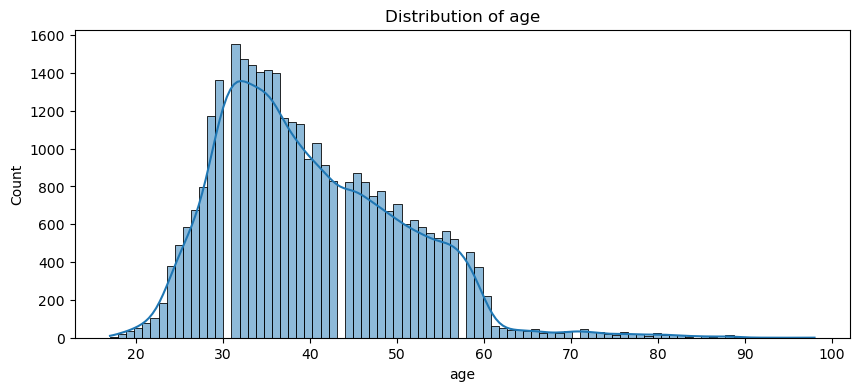

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


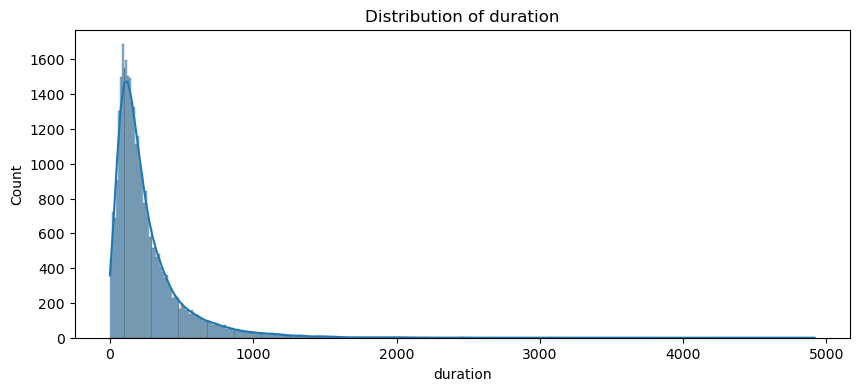

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


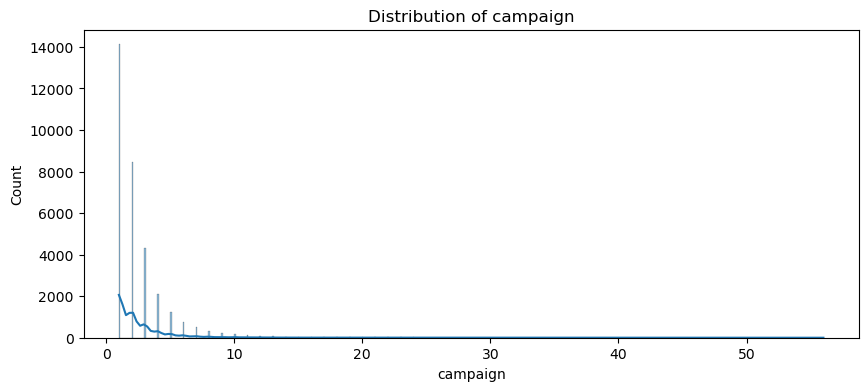

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


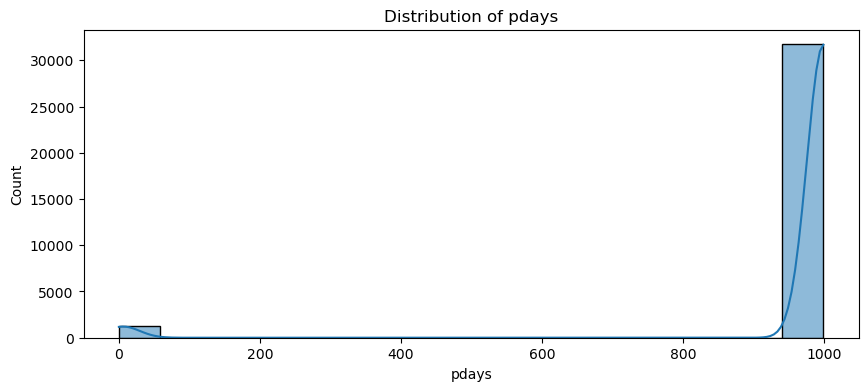

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


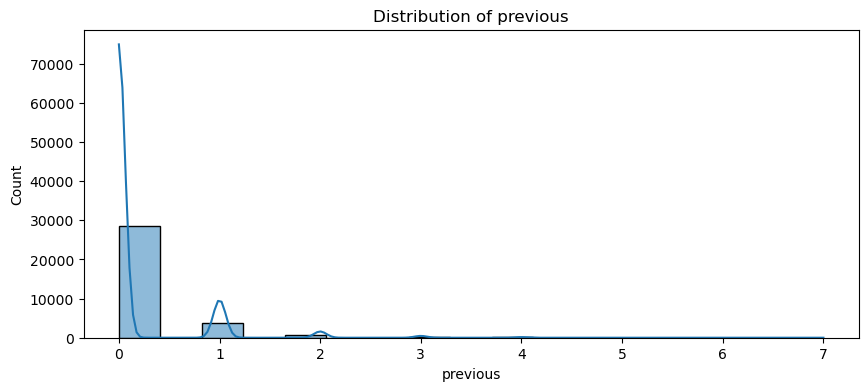

In [6]:
# Summary statistics for numerical columns
print(bank_data.describe())

# Visualize distributions of numerical features
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(bank_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

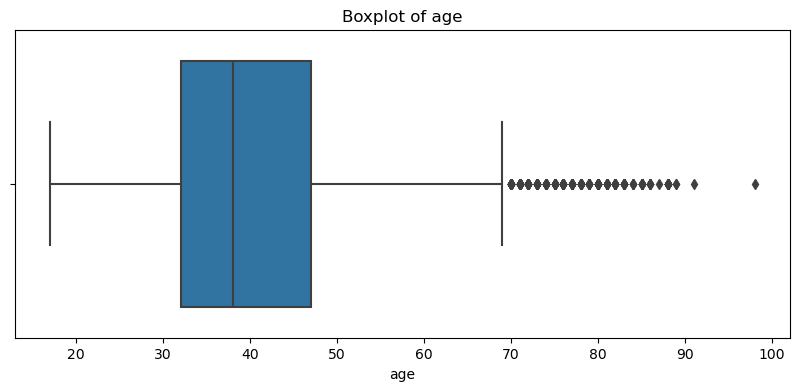

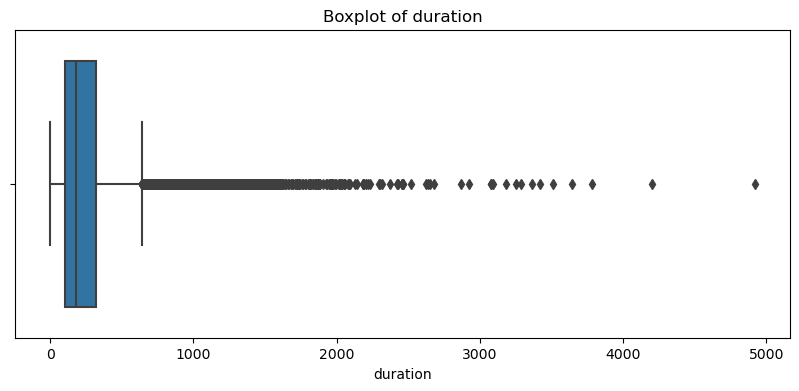

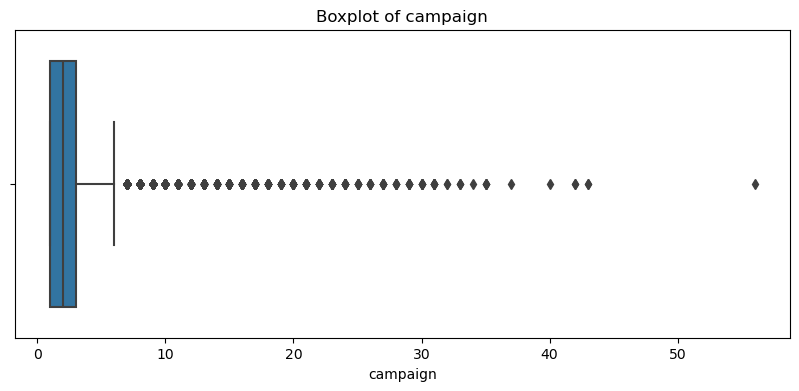

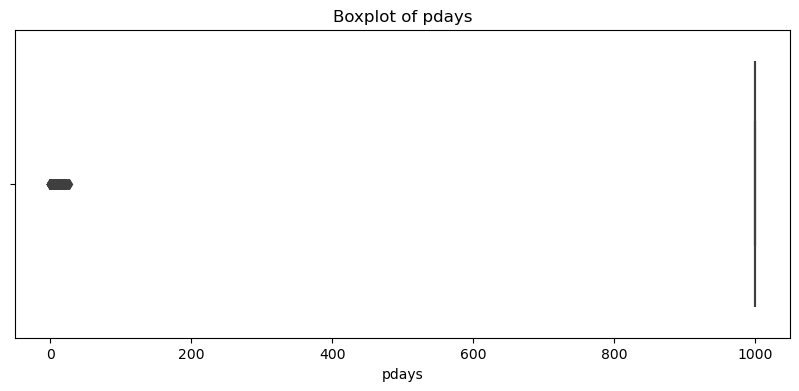

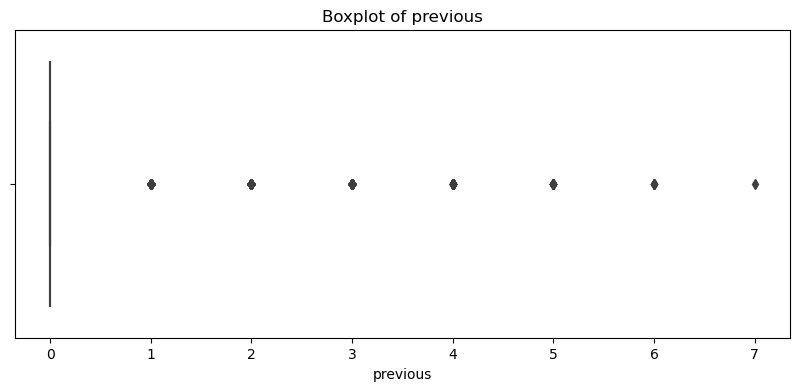

In [7]:
# Box plots for numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=bank_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

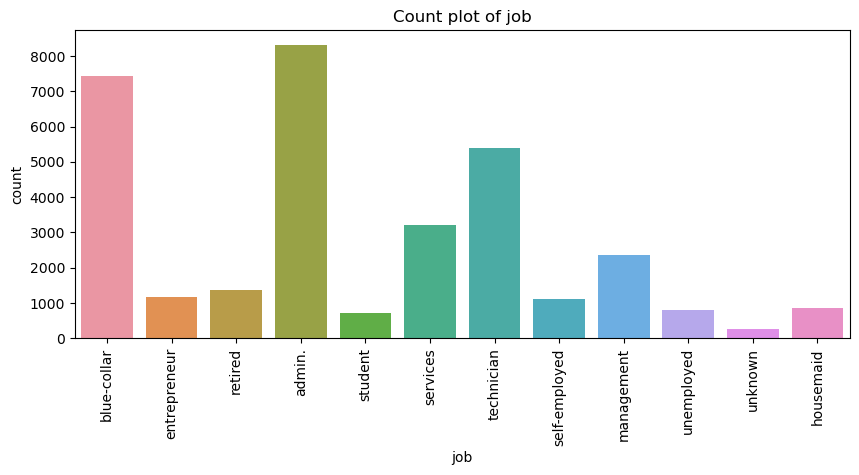

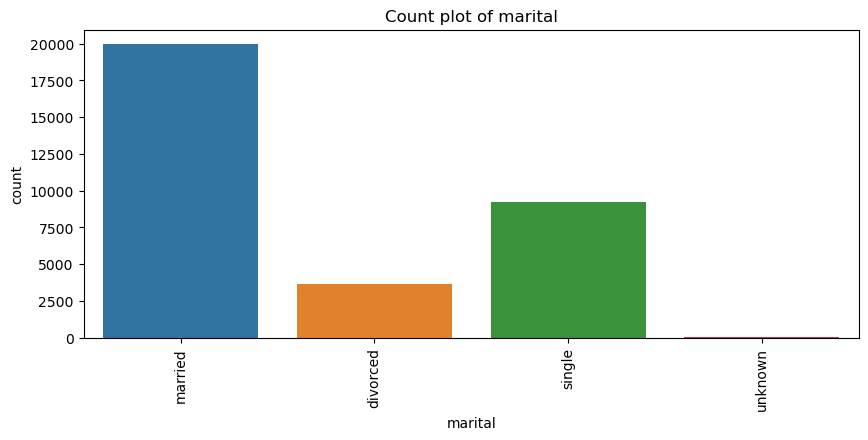

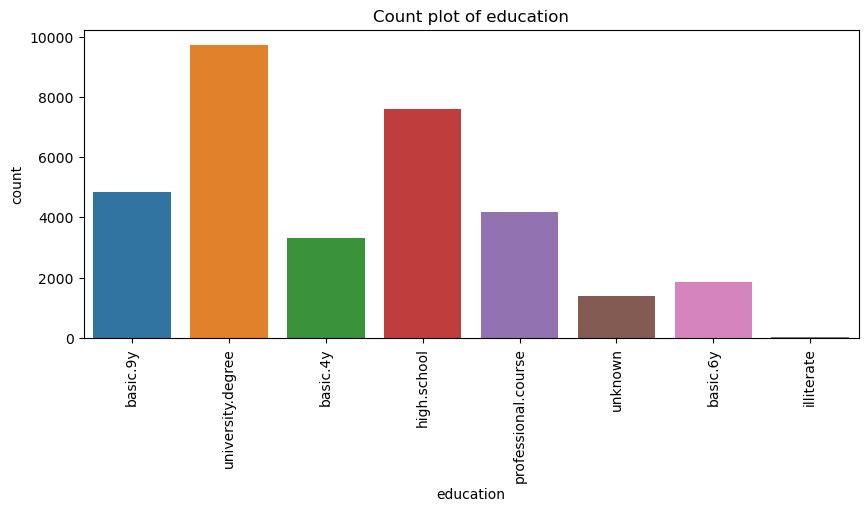

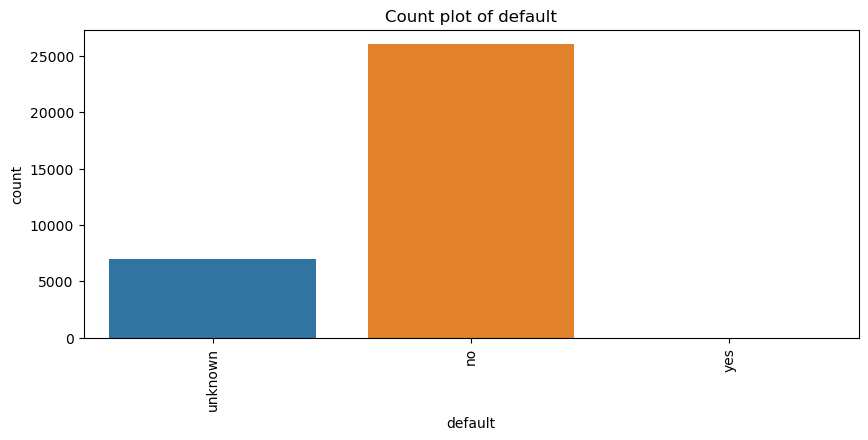

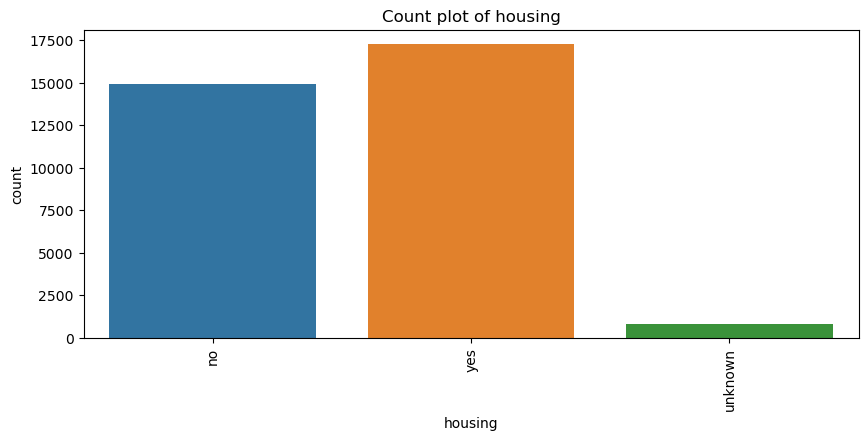

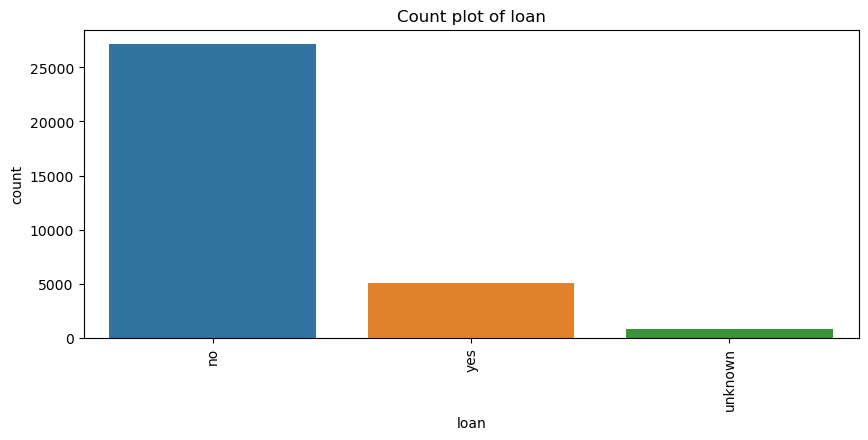

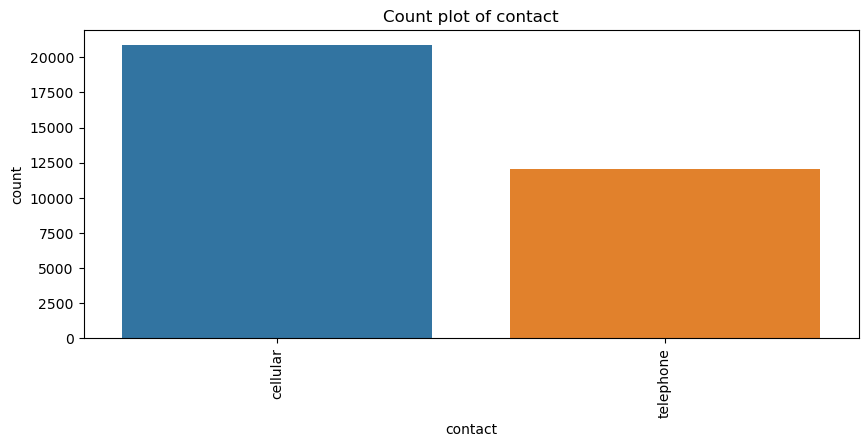

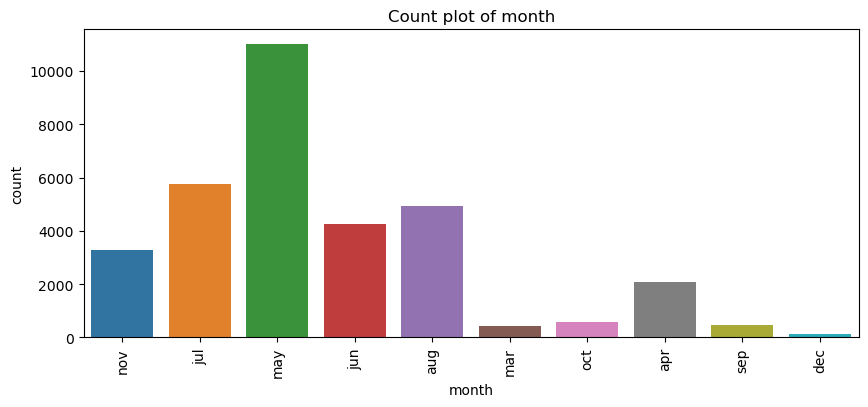

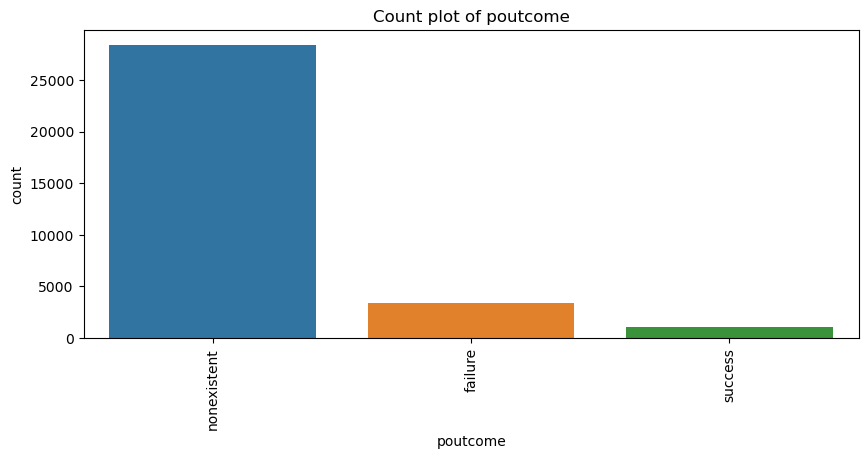

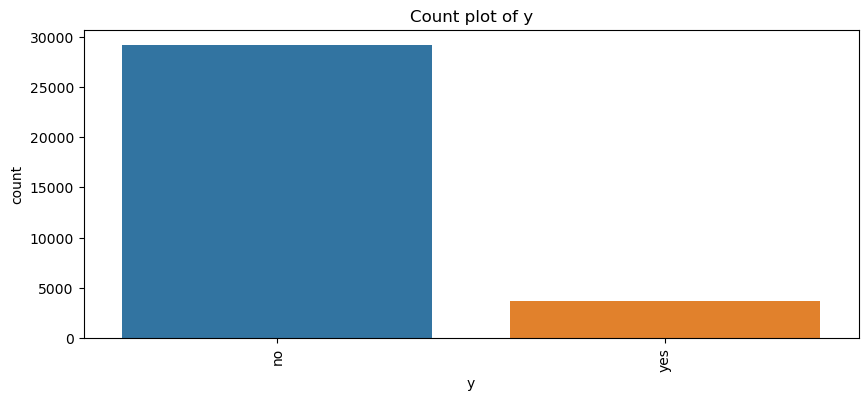

In [8]:
# Visualize categorical features
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=bank_data[col])
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [13]:
# Encode categorical variables
bank_data_encoded = pd.get_dummies(bank_data, columns=categorical_columns[:-1], drop_first=True)
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Encode the target variable separately
bank_data_encoded['y'] = bank_data['y'].map({'yes': 1, 'no': 0})

# Display the dataframe after encoding
print(bank_data_encoded.head())


# Display the dataframe after encoding
print(bank_data_encoded.head())

   age day_of_week  duration  campaign  pdays  previous  y  job_blue-collar  \
0   49         wed       227         4    999         0  0             True   
1   37         wed       202         2    999         1  0            False   
2   78         mon      1148         1    999         0  1            False   
3   36         mon       120         2    999         0  0            False   
4   59         tue       368         2    999         0  0            False   

   job_entrepreneur  job_housemaid  ...  month_dec  month_jul  month_jun  \
0             False          False  ...      False      False      False   
1              True          False  ...      False      False      False   
2             False          False  ...      False       True      False   
3             False          False  ...      False      False      False   
4             False          False  ...      False      False       True   

   month_mar  month_may  month_nov  month_oct  month_sep  \
0      F

In [18]:
# Step 5: Set the target variable and check its distribution
target_variable = 'y'  

In [21]:
# Check the distribution of target variable
print(bank_data[target_variable].value_counts())

y
no     29238
yes     3712
Name: count, dtype: int64


In [24]:
# Step 6: Impute missing values
# Example: Impute missing numerical values with mean, and categorical values with mode
for col in bank_data.columns:
    if bank_data[col].dtype == 'object':
        bank_data[col] = bank_data[col].fillna(bank_data[col].mode()[0])
    else:
        bank_data[col] = bank_data[col].fillna(bank_data[col].mean())

In [26]:
# Recheck missing values after imputation
print(bank_data.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


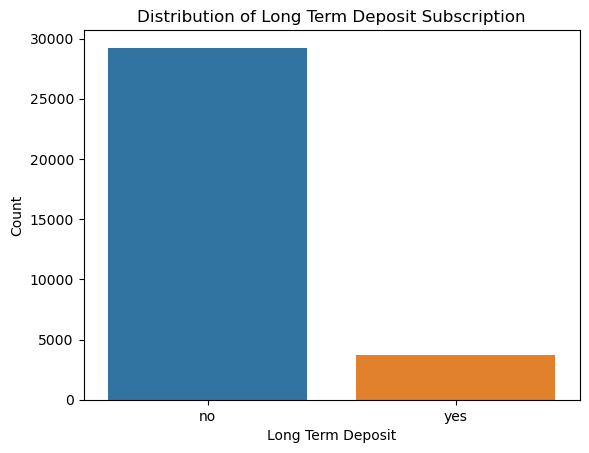

In [31]:
# Step 7: Visualize the target variable
sns.countplot(x=target_variable, data=bank_data)
plt.title('Distribution of Long Term Deposit Subscription')
plt.xlabel('Long Term Deposit')
plt.ylabel('Count')
plt.show()

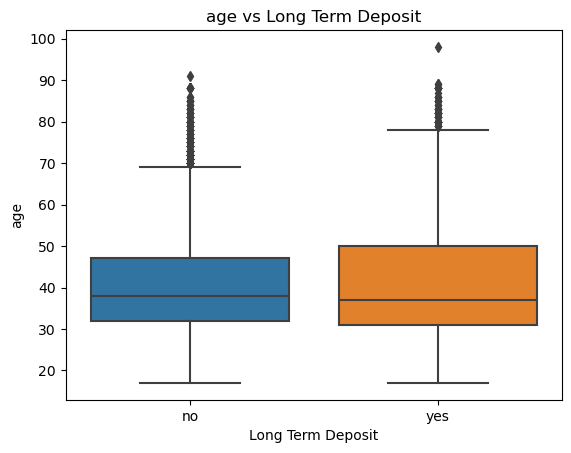

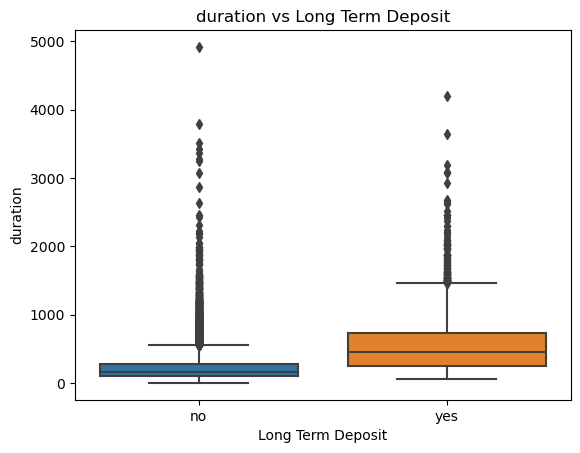

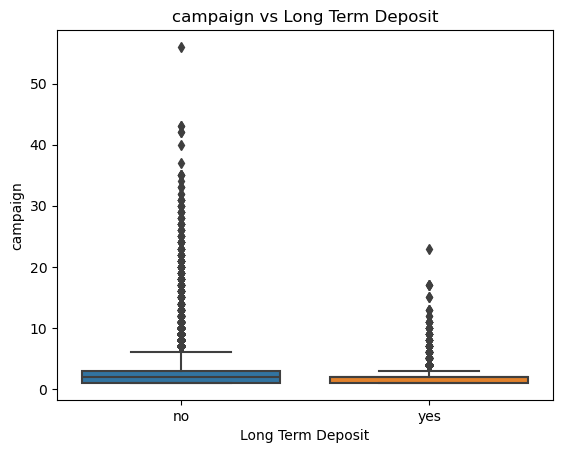

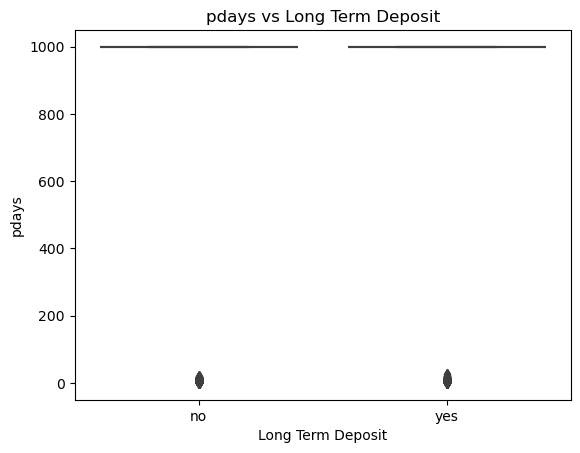

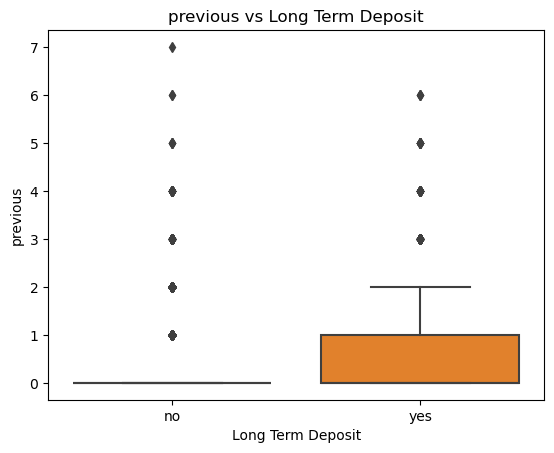

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [41]:
# Step 10: Explore relationships between features and target variable
for feature in numerical_columns + categorical_columns:  # Adjusted variable names
    if feature != target_variable:
        if feature in categorical_columns:  # Adjusted variable name
            sns.barplot(x=feature, y=target_variable, data=bank_data, estimator=lambda x: sum(x == 'yes') / len(x))
            plt.title(f'{feature} vs Long Term Deposit')
            plt.xlabel(feature)
            plt.ylabel('Long Term Deposit')
            plt.show()
        else:
            sns.boxplot(x=target_variable, y=feature, data=bank_data, orient='v')  # Adjusted variable name and orientation
            plt.title(f'{feature} vs Long Term Deposit')
            plt.xlabel('Long Term Deposit')
            plt.ylabel(feature)
            plt.show()


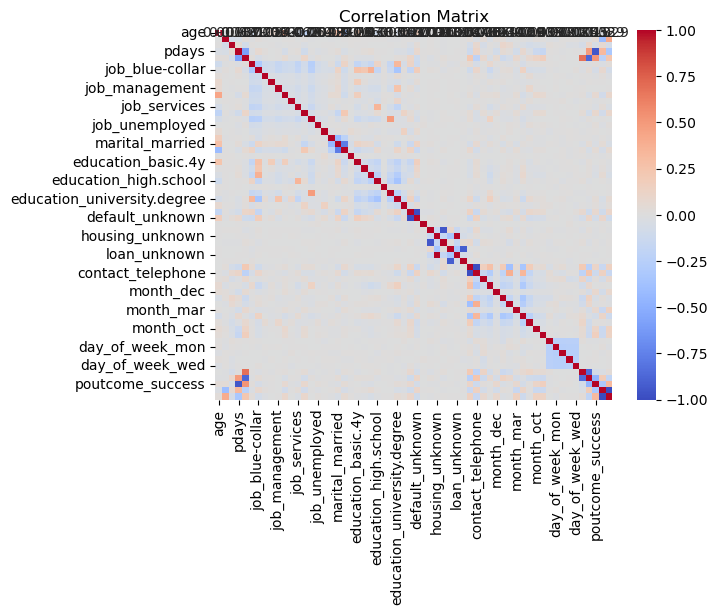

In [44]:
# Step 11: Correlation analysis after encoding categorical variables
# Convert categorical variables into dummy/indicator variables (one-hot encoding)
bank_data_encoded = pd.get_dummies(bank_data)

# Calculate correlation matrix
correlation_matrix = bank_data_encoded.corr()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Indices of outliers detected using Z-Score method:
(array([    2,     2,    19, ..., 32877, 32901, 32941]), array([0, 1, 3, ..., 1, 4, 3]))


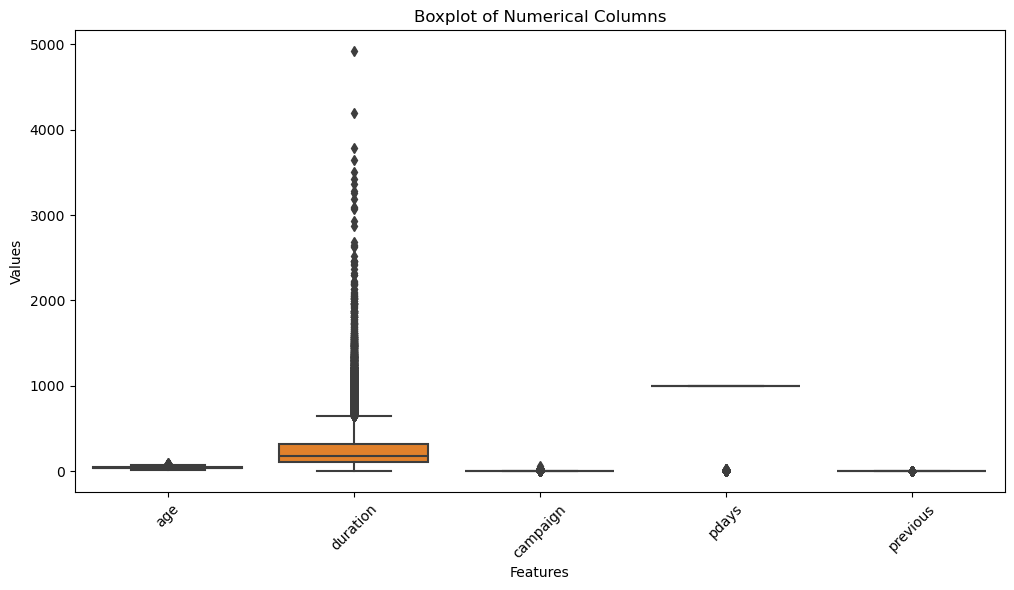

In [45]:
# Step 12: Check for outliers using Z-Score method
from scipy import stats

# Define a function to detect outliers using Z-Score
def detect_outliers_zscore(data):
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > 3)

# Apply the function to numerical columns
outliers_indices = detect_outliers_zscore(bank_data[numerical_columns])

# Print the indices of outliers
print("Indices of outliers detected using Z-Score method:")
print(outliers_indices)

# Step 13: Visualize outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=bank_data[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

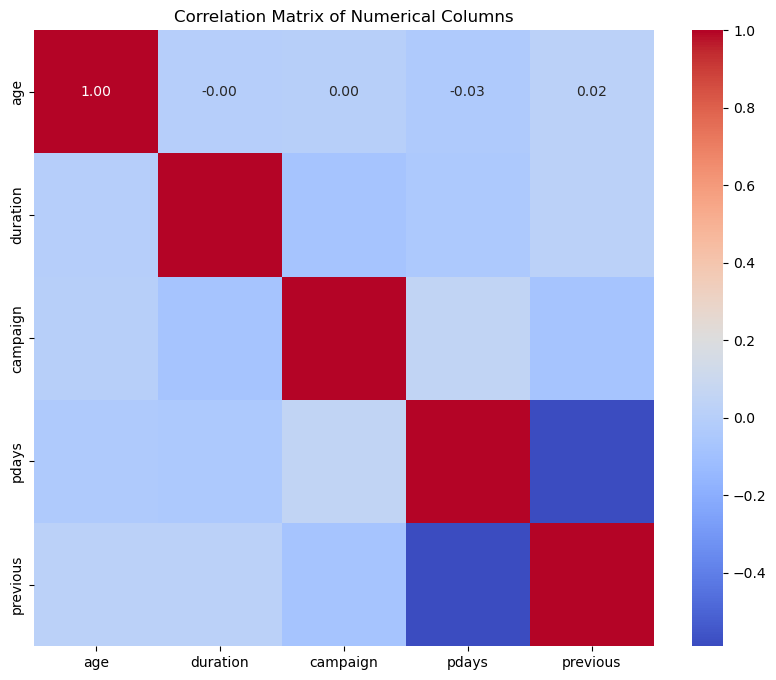

In [46]:
# Step 11: Correlation analysis between numerical columns
numerical_correlation_matrix = bank_data[numerical_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'age': [25, 32, 47, 51, 62],
    'job': ['admin.', 'technician', 'entrepreneur', 'blue-collar', 'retired'],
    'marital': ['married', 'single', 'single', 'married', 'divorced'],
    'education': ['secondary', 'tertiary', 'secondary', 'primary', 'secondary'],
    'default': ['no', 'no', 'no', 'yes', 'no'],
    'housing': ['yes', 'yes', 'no', 'yes', 'no'],
    'loan': ['no', 'yes', 'no', 'no', 'yes'],
    'contact': ['unknown', 'cellular', 'unknown', 'cellular', 'telephone'],
    'month': ['may', 'jul', 'may', 'jun', 'nov'],
    'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri'],
    'duration': [1042, 122, 231, 301, 180],
    'campaign': [1, 3, 1, 2, 1],
    'pdays': [999, 999, 999, 6, 999],
    'previous': [0, 0, 0, 1, 0],
    'poutcome': ['nonexistent', 'nonexistent', 'nonexistent', 'success', 'nonexistent'],
    'y': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Convert categorical columns to numeric for correlation calculation
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = df.corr()

# Get correlations with target variable
target_variable = 'y'
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

print("Correlation of each feature with the target variable:")
print(correlation_with_target)


Correlation of each feature with the target variable:
y              1.000000e+00
campaign       9.185587e-01
housing        6.666667e-01
default        6.123724e-01
previous       6.123724e-01
poutcome       6.123724e-01
marital        3.273268e-01
job            2.886751e-01
day_of_week    2.886751e-01
loan           1.666667e-01
education      7.166459e-17
age           -1.165929e-01
duration      -3.947841e-01
pdays         -6.123724e-01
month         -8.807048e-01
contact       -9.128709e-01
Name: y, dtype: float64


Correlation of each feature with the target variable:
y           1.000000
campaign    0.918559
previous    0.612372
age        -0.116593
duration   -0.394784
pdays      -0.612372
Name: y, dtype: float64
Outliers in age: []
After handling outliers in age:
   age  duration  campaign  pdays  previous  y
0   25      1042         1    999         0  0
1   32       122         3    999         0  1
2   47       231         1    999         0  0
3   51       301         2      6         1  1
4   62       180         1    999         0  0
Outliers in duration: [1042]
After handling outliers in duration:
   age  duration  campaign  pdays  previous  y
1   32       122         3    999         0  1
2   47       231         1    999         0  0
3   51       301         2      6         1  1
4   62       180         1    999         0  0
Outliers in pdays: [6]
After handling outliers in pdays:
   age  duration  campaign  pdays  previous  y
1   32       122         3    999         0  1
2   47    

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

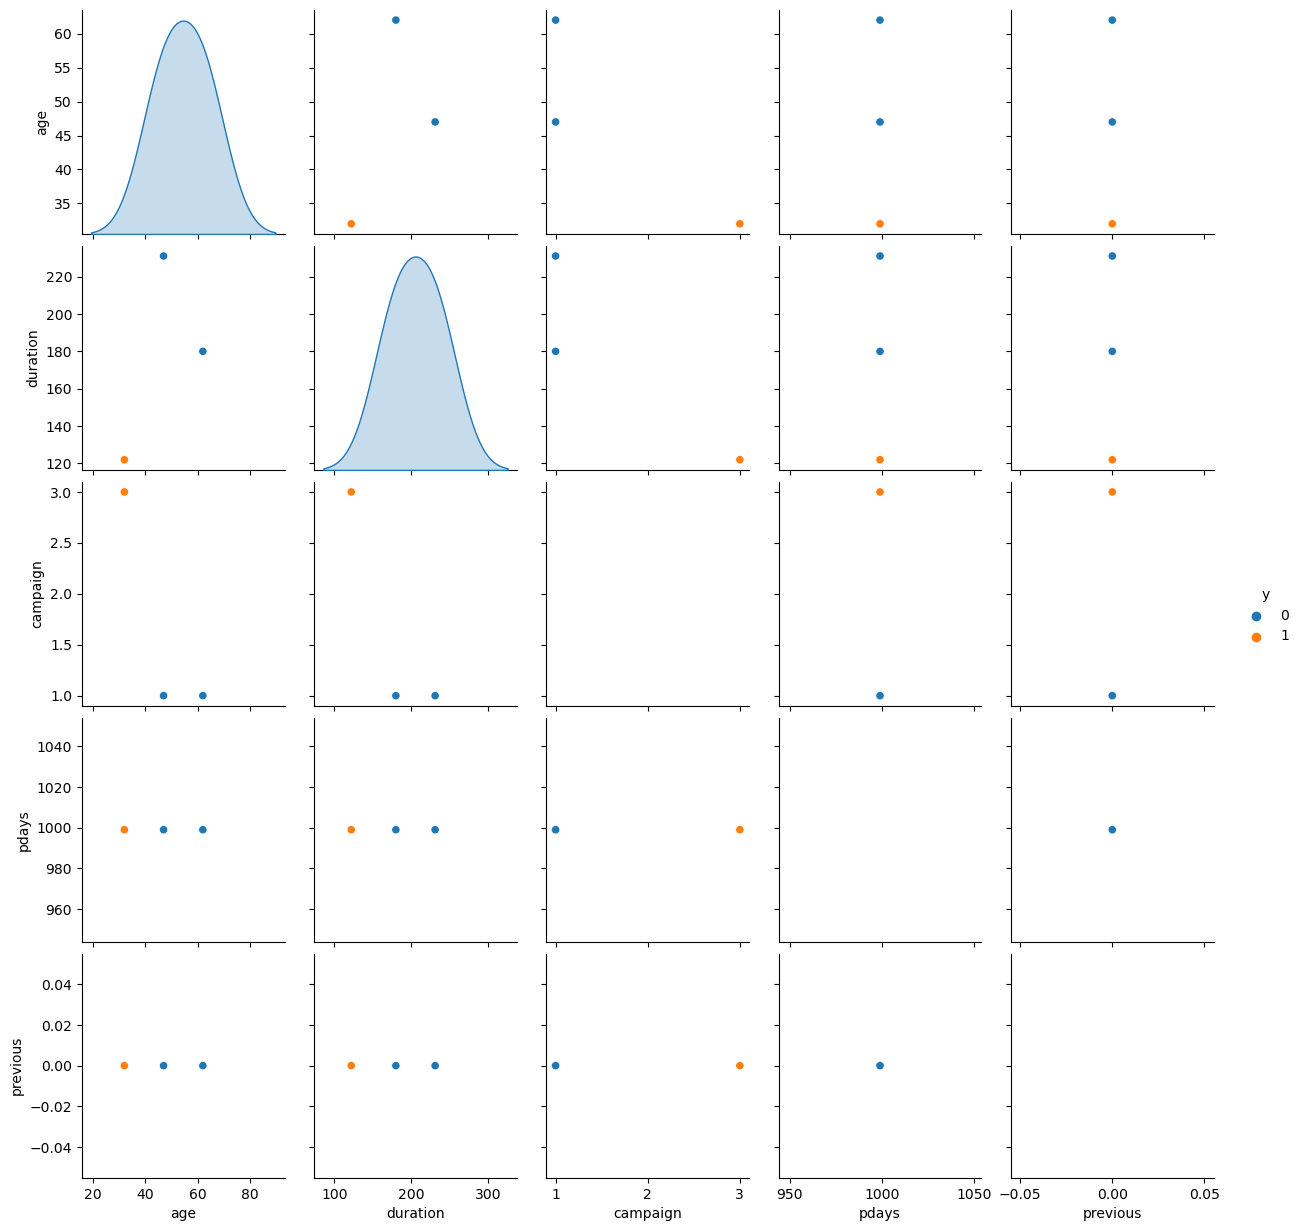

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'age': [25, 32, 47, 51, 62],
    'duration': [1042, 122, 231, 301, 180],
    'campaign': [1, 3, 1, 2, 1],
    'pdays': [999, 999, 999, 6, 999],
    'previous': [0, 0, 0, 1, 0],
    'y': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Check correlation with target variable
target_variable = 'y'
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

print("Correlation of each feature with the target variable:")
print(correlation_with_target)

# Define a function to identify outliers using IQR
def identify_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Identify outliers for negatively correlated features
outliers_info = {}
for feature in numerical_columns:
    if correlation_with_target[feature] < 0:
        outliers = identify_outliers(df, feature)
        outliers_info[feature] = outliers[feature].values
        print(f"Outliers in {feature}:", outliers[feature].values)

        # Optionally drop the outliers
        df = df[~df[feature].isin(outliers[feature])]
        print(f"After handling outliers in {feature}:")
        print(df)

# Visualize the cleaned data
sns.pairplot(df, hue=target_variable)
plt.show()


In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

# Sample DataFrame
data = {
    'age': [25, 32, 47, 51, 62],
    'duration': [1042, 122, 231, 301, 180],
    'campaign': [1, 3, 1, 2, 1],
    'pdays': [999, 999, 999, 6, 999],
    'previous': [0, 0, 0, 1, 0],
    'y': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Handling missing values (if any)
# Here, we'll just fill missing values with the median of each column
# df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Applying Log Transformation to 'duration' to handle skewness
df['duration_log'] = np.log1p(df['duration'])

# Scaling the numerical features
# 1. Standard Scaling (mean=0, variance=1)
standard_scaler = StandardScaler()
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# 2. Min-Max Scaling (scales to range [0, 1])
minmax_scaler = MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df[numerical_columns])

# 3. Robust Scaling (scales using median and IQR, robust to outliers)
robust_scaler = RobustScaler()
df_robust_scaled = robust_scaler.fit_transform(df[numerical_columns])

# 4. Power Transformation (e.g., Yeo-Johnson or Box-Cox, makes data more Gaussian-like)
power_transformer = PowerTransformer(method='yeo-johnson')  # Use 'box-cox' if data is strictly positive
df_power_transformed = power_transformer.fit_transform(df[numerical_columns])

# Create DataFrame for each scaled version
df_standard_scaled = pd.DataFrame(df[numerical_columns], columns=numerical_columns)
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=numerical_columns)
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=numerical_columns)
df_power_transformed = pd.DataFrame(df_power_transformed, columns=numerical_columns)

# Display the transformed data
print("Standard Scaled Data:\n", df_standard_scaled)
print("\nMin-Max Scaled Data:\n", df_minmax_scaled)
print("\nRobust Scaled Data:\n", df_robust_scaled)
print("\nPower Transformed Data:\n", df_power_transformed)


Standard Scaled Data:
         age  duration  campaign  pdays  previous         y
0 -1.382872  1.969483     -0.75    0.5      -0.5 -0.816497
1 -0.856780 -0.747860      1.75    0.5      -0.5  1.224745
2  0.270562 -0.425914     -0.75    0.5      -0.5 -0.816497
3  0.571186 -0.219160      0.50   -2.0       2.0  1.224745
4  1.397904 -0.576549     -0.75    0.5      -0.5 -0.816497

Min-Max Scaled Data:
         age  duration  campaign  pdays  previous    y
0  0.000000  1.000000       0.0    1.0       0.0  0.0
1  0.189189  0.000000       1.0    1.0       0.0  1.0
2  0.594595  0.118478       0.0    1.0       0.0  0.0
3  0.702703  0.194565       0.5    0.0       1.0  1.0
4  1.000000  0.063043       0.0    1.0       0.0  0.0

Robust Scaled Data:
         age  duration  campaign  pdays  previous    y
0 -1.157895  6.702479       0.0    0.0       0.0  0.0
1 -0.789474 -0.900826       2.0    0.0       0.0  1.0
2  0.000000  0.000000       0.0    0.0       0.0  0.0
3  0.210526  0.578512       1.0   -2.5

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

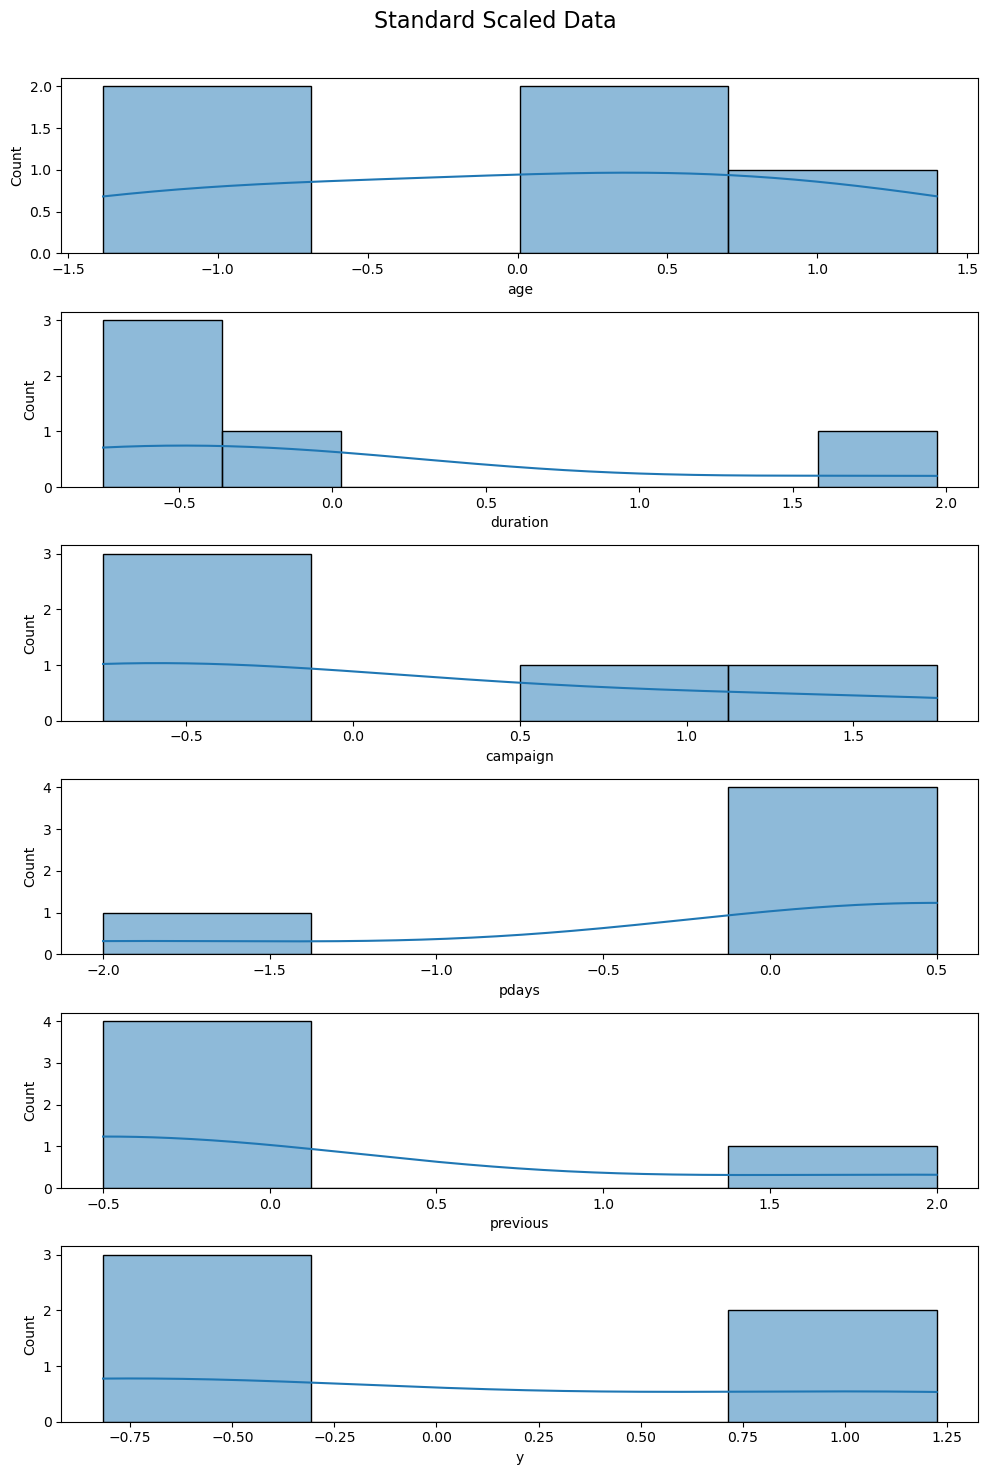

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

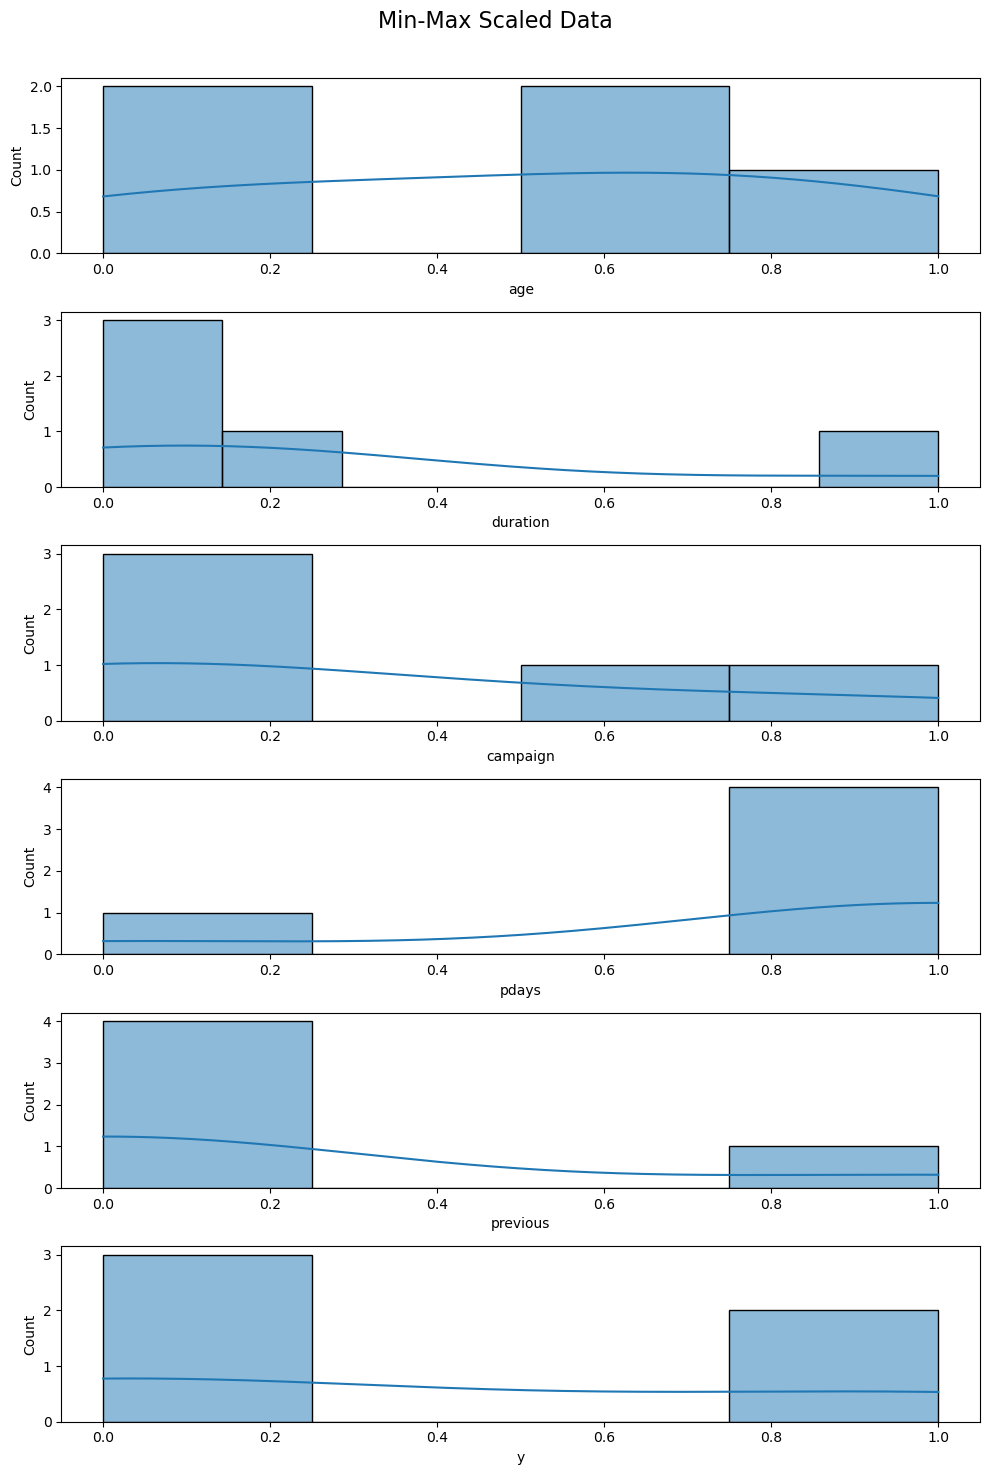

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

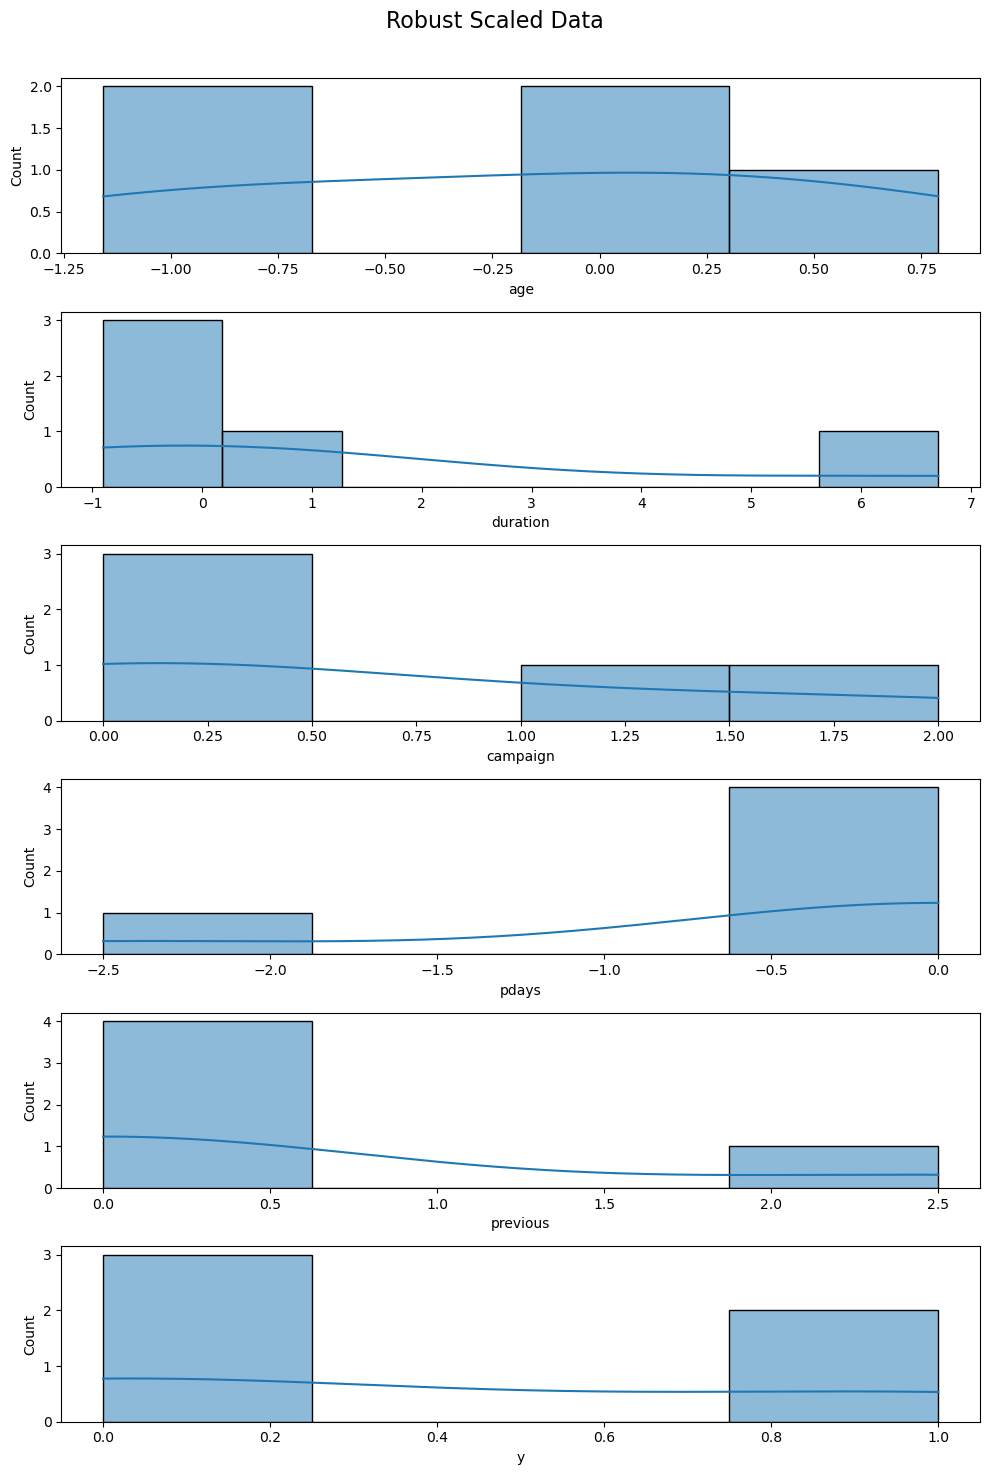

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

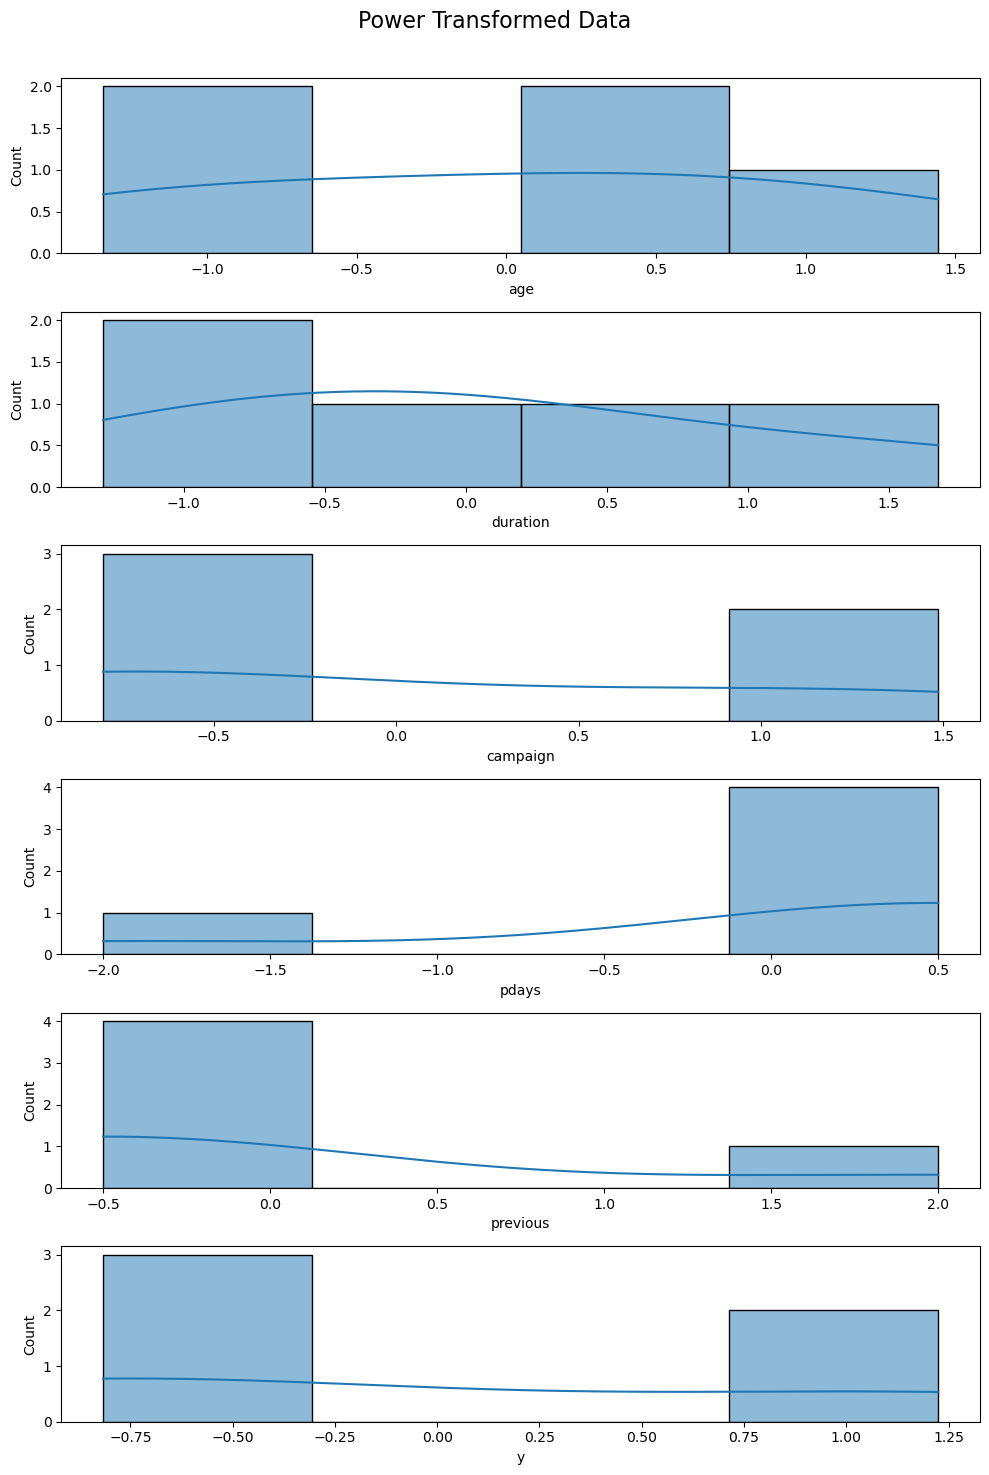

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot histograms
def plot_histograms(data, columns, title):
    fig, axes = plt.subplots(len(columns), 1, figsize=(10, 15))
    fig.suptitle(title, fontsize=16)
    for i, col in enumerate(columns):
        sns.histplot(data[col], ax=axes[i], kde=True)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Plot histograms of the original and transformed data
plot_histograms(df_standard_scaled, numerical_columns, "Standard Scaled Data")
plot_histograms(df_minmax_scaled, numerical_columns, "Min-Max Scaled Data")
plot_histograms(df_robust_scaled, numerical_columns, "Robust Scaled Data")
plot_histograms(df_power_transformed, numerical_columns, "Power Transformed Data")


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [60]:
# Load the dataset
bank_data = pd.read_csv('new_train.csv')

# Define the target variable and features
target_variable = 'y'
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [61]:
# Univariate Selection
X = bank_data[numerical_columns]
y = bank_data[target_variable].apply(lambda x: 1 if x == 'yes' else 0)

select_k_best = SelectKBest(score_func=f_classif, k=5)
X_new = select_k_best.fit_transform(X, y)
selected_features_k_best = X.columns[select_k_best.get_support()]

print("Selected features using SelectKBest:")
print(selected_features_k_best)


Selected features using SelectKBest:
Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [62]:
# Feature Importance using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature importances from RandomForestClassifier:")
print(feature_importances)


Feature importances from RandomForestClassifier:
duration    0.592772
age         0.221171
pdays       0.096441
campaign    0.054226
previous    0.035390
dtype: float64


In [63]:
# Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

selected_features_rfe = X.columns[fit.support_]

print("Selected features using RFE:")
print(selected_features_rfe)


Selected features using RFE:
Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [64]:
# Combine all selected features
all_selected_features = set(selected_features_k_best) | set(feature_importances.head(5).index) | set(selected_features_rfe)

print("Combined selected features from all methods:")
print(all_selected_features)


Combined selected features from all methods:
{'campaign', 'duration', 'age', 'pdays', 'previous'}


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
bank_data = pd.read_csv('new_train.csv')

# Define the target variable and features
target_variable = 'y'
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Convert target variable to binary
bank_data[target_variable] = bank_data[target_variable].apply(lambda x: 1 if x == 'yes' else 0)

# One-hot encode categorical variables
bank_data = pd.get_dummies(bank_data, columns=categorical_columns, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
bank_data[numerical_columns] = scaler.fit_transform(bank_data[numerical_columns])

# Define features and target variable
X = bank_data.drop(columns=[target_variable])
y = bank_data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define oversampling and undersampling strategies
oversample = SMOTE(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.8)

# Create a pipeline
steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline to the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Verify the balancing
print("Original target variable distribution:")
print(y.value_counts())
print("\nResampled target variable distribution:")
print(pd.Series(y_train_resampled).value_counts())


Original target variable distribution:
y
0    29238
1     3712
Name: count, dtype: int64

Resampled target variable distribution:
y
0    12791
1    10233
Name: count, dtype: int64


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
bank_data = pd.read_csv('new_train.csv')

# Define the target variable and features
target_variable = 'y'
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Convert target variable to binary
bank_data[target_variable] = bank_data[target_variable].apply(lambda x: 1 if x == 'yes' else 0)

# One-hot encode categorical variables
bank_data = pd.get_dummies(bank_data, columns=categorical_columns, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
bank_data[numerical_columns] = scaler.fit_transform(bank_data[numerical_columns])

# Define features and target variable
X = bank_data.drop(columns=[target_variable])
y = bank_data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[7713 1058]
 [ 341  773]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8771
           1       0.42      0.69      0.52      1114

    accuracy                           0.86      9885
   macro avg       0.69      0.79      0.72      9885
weighted avg       0.90      0.86      0.87      9885


Accuracy Score:
0.8584724329792615


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
